In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("devendra416/ddos-datasets")

print("Path to dataset files:", path)

/home/vanya/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2.68G/2.68G [08:45<00:00, 5.48MB/s]

Extracting files...


Path to dataset files: /home/vanya/.cache/kagglehub/datasets/devendra416/ddos-datasets/versions/1


In [35]:
import numpy as np
import pandas as pd
import os
path = "/home/vanya/bigdata_dataset/ddos_balanced/final_dataset.csv"

total_num_of_rows = sum(1 for _ in open(path))
rows_to_read = int(total_num_of_rows * 0.20)
first_part = pd.read_csv(path, nrows=rows_to_read)
rows_to_skip = int(total_num_of_rows * 0.80)
second_part = pd.read_csv(path, skiprows=range(1, rows_to_skip + 1))
df = pd.concat([first_part, second_part], ignore_index=True)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5117850 entries, 0 to 5117849
Data columns (total 85 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Flow ID            object 
 2   Src IP             object 
 3   Src Port           int64  
 4   Dst IP             object 
 5   Dst Port           int64  
 6   Protocol           int64  
 7   Timestamp          object 
 8   Flow Duration      int64  
 9   Tot Fwd Pkts       int64  
 10  Tot Bwd Pkts       int64  
 11  TotLen Fwd Pkts    float64
 12  TotLen Bwd Pkts    float64
 13  Fwd Pkt Len Max    float64
 14  Fwd Pkt Len Min    float64
 15  Fwd Pkt Len Mean   float64
 16  Fwd Pkt Len Std    float64
 17  Bwd Pkt Len Max    float64
 18  Bwd Pkt Len Min    float64
 19  Bwd Pkt Len Mean   float64
 20  Bwd Pkt Len Std    float64
 21  Flow Byts/s        float64
 22  Flow Pkts/s        float64
 23  Flow IAT Mean      float64
 24  Flow IAT Std       float64
 25  Flow IAT Max      

In [37]:
df = df.astype({'Src IP':'string','Dst IP':'string','Label':'string'}) 

In [38]:
import seaborn as sn
import matplotlib.pyplot as plt

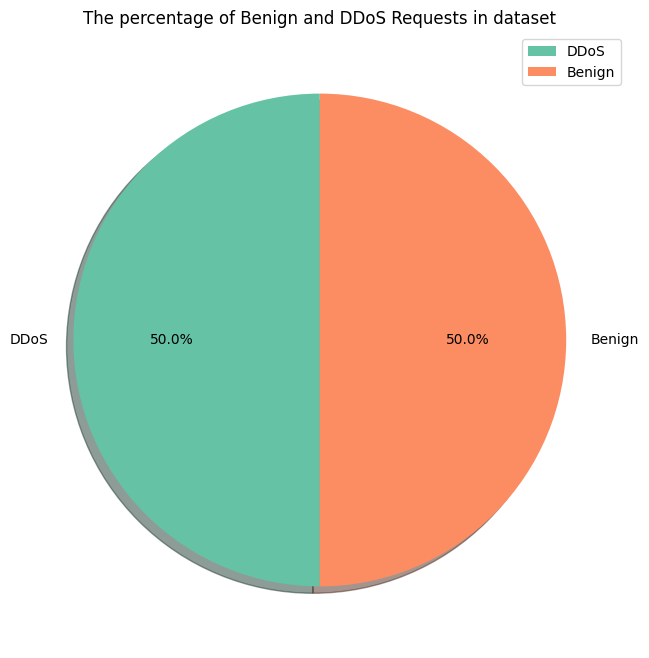

In [39]:
Label = ['DDoS','Benign']
num_of_ddos_classes = df['Label'].value_counts()['ddos']
num_of_benign_classes = df['Label'].value_counts()['Benign']
plt.figure(figsize = (13,8))
colors = sn.color_palette("Set2")
plt.pie([num_of_ddos_classes, num_of_benign_classes], labels=Label, autopct='%1.1f%%',shadow=True, startangle=90,colors=colors)
plt.legend(['DDoS', 'Benign'])
plt.title('The percentage of Benign and DDoS Requests in dataset')
plt.show()

In [40]:
for i in df['Bwd Pkts/b Avg']:
    if i != 0:
        print("Fov")

# Переведем object в тип string и закодируем ip

In [41]:
import ipaddress                                                                   # converting the IP address form Strings to int

df = df.astype({'Src IP':'string','Dst IP':'string','Label':'string'}) 

df['Src IP'] = df['Src IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
df['Dst IP'] = df['Dst IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))


In [42]:
df


,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,624,192.168.4.118-203.73.24.75-4504-80-6,3232236662,4504,3410565195,80,6,12/06/2010 08:34:32 AM,3974862,29,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
1,625,192.168.4.118-203.73.24.75-4504-80-6,3232236662,4504,3410565195,80,6,12/06/2010 08:34:36 AM,63,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,626,192.168.4.118-203.73.24.75-4505-80-6,3232236662,4505,3410565195,80,6,12/06/2010 08:34:36 AM,476078,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,627,192.168.4.118-203.73.24.75-4505-80-6,3232236662,4505,3410565195,80,6,12/06/2010 08:34:37 AM,151,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,628,192.168.4.118-203.73.24.75-4506-80-6,3232236662,4506,3410565195,80,6,12/06/2010 08:34:37 AM,472507,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5117845,1725894,172.31.67.50-209.85.203.113-53598-80-6,3512060785,80,2887729970,53598,6,20/02/2018 05:14:52,50,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
5117846,5681778,172.31.69.17-108.174.10.14-54599-443-6,2887730449,54599,1823345166,443,6,20/02/2018 03:08:35,306,3,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
5117847,6395326,172.31.0.2-172.31.65.49-53-61087-17,2887729457,61087,2887712770,53,17,20/02/2018 01:03:19,362,1,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
5117848,4926899,172.31.0.2-172.31.67.58-53-61580-17,2887729978,61580,2887712770,53,17,20/02/2018 12:43:11,303,1,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


# Проверим наличие пропусков в датасете

In [43]:
g = df.isna().sum()
for col_name in g.index:  # Итерируем по названиям колонок
    if g[col_name] != 0:
        print("Найдено пропусков ", col_name, g[col_name])

Найдено пропусков  Flow Byts/s 11951


# Найдем столбцы столбцы с большим кол-во повторяющихся значений

In [44]:

rowbuilder = lambda col: {'col': col, 'unique_values': df[col].nunique(), 'most_frequent_value': df[col].value_counts().index[0],'frequency': df[col].value_counts(normalize=True).values[0]}
frequency = [rowbuilder(col) for col in df.columns]
skewed = pd.DataFrame(frequency)

skewed = skewed[skewed['frequency'] >= 0.95]
colsToDrop = skewed['col'].values
colsToDrop

array(['Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
       'FIN Flag Cnt', 'URG Flag Cnt', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',
       'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
       'Bwd Blk Rate Avg', 'Active Std'], dtype=object)

# Найдем столбцы с пропущенными значениями

In [45]:

del skewed
del rowbuilder
del frequency

missing = df.isna().sum()
missing = pd.DataFrame({'count': missing, '% of total': missing/len(df)*100}, index=df.columns)
missing
colsToDrop = np.union1d(colsToDrop, missing[missing['% of total'] >= 50].index.values)
dropnaCols = missing[(missing['% of total'] > 0) & (missing['% of total'] <= 5)].index.values
dropnaCols, colsToDrop

(array(['Flow Byts/s'], dtype=object),
 array(['Active Std', 'Bwd Blk Rate Avg', 'Bwd Byts/b Avg',
        'Bwd PSH Flags', 'Bwd Pkts/b Avg', 'Bwd URG Flags', 'FIN Flag Cnt',
        'Fwd Blk Rate Avg', 'Fwd Byts/b Avg', 'Fwd PSH Flags',
        'Fwd Pkts/b Avg', 'Fwd URG Flags', 'URG Flag Cnt'], dtype=object))

# Удалим столбцы с большим кол-во повторяющихся значений и с пропусками

In [46]:

df.drop(columns=colsToDrop, inplace=True)
df.dropna(subset=dropnaCols, inplace=True)

print('After dropping some columns: \n\t there are {} columns and {} rows'.format(len(df.columns), len(df)))

After dropping some columns: 
	 there are 72 columns and 5105899 rows


# Удалим столбцы с бесконечными значениями


In [47]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Шаг 2: Находим строки с бесконечными значениями в числовых столбцах
rows_with_inf = df[np.isinf(df[numeric_columns]).any(axis=1)]

# Шаг 3: Собираем имена столбцов, содержащих бесконечные значения
inf_subset = set()
for index, row in rows_with_inf.iterrows():
    for column_name, value in row[numeric_columns].items():  # Только числовые столбцы
        if np.isinf(value):  # Проверяем, является ли значение бесконечностью
            inf_subset.add(column_name)

inf_subset = list(inf_subset)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=inf_subset, how="all", inplace=True)
rows_with_inf = df[np.isinf(df[numeric_columns]).any(axis=1)]
colsToDrop = set([i for i in colsToDrop]) | set(inf_subset)

In [48]:
df.shape

(5098561, 72)

# Удалим возможные отрицательные значения (признаки приведенные ниже не могу быть отрицательными)


In [ ]:
negValCols = ['Src IP', 'Dst IP', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Min', 'Init Bwd Win Byts', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Max', 'Bwd IAT Min']
print(colsToDrop)
negValCols = set(negValCols) - colsToDrop
print(negValCols)
for col in negValCols:
    if df[col].dtype in ['float64', 'int64']:
        df = df[df[col] >= 0]

{'Active Std', 'Fwd PSH Flags', 'Fwd URG Flags', 'URG Flag Cnt', 'Bwd URG Flags', 'Flow Pkts/s', 'Fwd Pkts/b Avg', 'Bwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Blk Rate Avg', 'FIN Flag Cnt', 'Bwd PSH Flags', 'Fwd Byts/b Avg', 'Flow Byts/s'}
{'Init Bwd Win Byts', 'Bwd IAT Mean', 'Flow IAT Max', 'Dst IP', 'Flow IAT Mean', 'Bwd IAT Max', 'Bwd IAT Tot', 'Src IP', 'Bwd IAT Min', 'Flow IAT Min'}


In [ ]:
df.shape

# Опираясь на предметную область, выберем наиболее важные признаки

In [ ]:
most_important_features = set([
    "Src IP",
    "Src Port",
    "Dst IP",
    "Dst Port",
    "Protocol",
    "Tot Fwd Pkts",
    "Tot Bwd Pkts",
    "Fwd Pkt Len Max",
    "TotLen Fwd Pkts",
    "Fwd Seg Size Min",
    "Init Bwd Win Byts",
    "Bwd Pkt Len Std",
    "Flow Duration",
    "Fwd IAT Mean",
    "Flow IAT Min",
    "Bwd IAT Tot",
    "SYN Flag Cnt",
    "RST Flag Cnt",
    "PSH Flag Cnt",
    "Flow Pkts/s",
    "Flow Byts/s",
    "Label"])
droped_cols = set([i for i in colsToDrop]) | set(inf_subset)
colsToUse = list(most_important_features - droped_cols)
colsToUse

In [ ]:
df = df[colsToUse]
df

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# for feature in df.columns: 
#     plt.figure(figsize=(8, 4))
#     sns.histplot(data=df, x=feature, kde=True, bins=30)
#     plt.title(f"Распределение {feature}")
#     plt.show()

# Расчитаем выбросы

In [ ]:
import numpy as np
from robustats import medcouple

def adjusted_boxplot(data):
    data = np.array(data, dtype=np.float64)
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    mc = medcouple(data)  # Медианный коэффициент асимметрии
    
    # Корректировка границ
    if mc >= 0:
        lower_bound = q1 - 1.5 * np.exp(-4 * mc) * iqr
        upper_bound = q3 + 1.5 * np.exp(3 * mc) * iqr
    else:
        lower_bound = q1 - 1.5 * np.exp(-3 * mc) * iqr
        upper_bound = q3 + 1.5 * np.exp(4 * mc) * iqr
    
    return lower_bound, upper_bound

# Пример для признака 'Tot Fwd Pkts'

def outliers_iqr(data, coef=4):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - coef * iqr
    upper_bound = q3 + coef * iqr
    return lower_bound, upper_bound

def outliers(df, feature):
    if df[feature].dtype in ["float64", "int64"] and feature not in set(["Label", "Src Port", "Src IP", "Dst IP"]):
        main_data = df[df[feature] > 0][feature]
        soft_upper = main_data.quantile(0.95)  # Верхние 1% считаем выбросами
        extreme_mask = (df[feature] > soft_upper)
        df[feature] = np.where(extreme_mask, soft_upper, df[feature])  # Winsorization

# Выберем подвыборку для GNB и для random forest

In [ ]:
df_forest = df.copy()
df_gaus = df.copy()
df_gaus.drop(columns=['Label', 'Src Port', 'Src IP', 'Dst IP'])

for feature in df_gaus.columns:
    outliers(df_gaus, feature)
    print(len(df_gaus))


In [ ]:
df_gaus.shape

In [ ]:
Label = ['DDoS','Benign']
num_of_ddos_classes = df['Label'].value_counts()['ddos']
num_of_benign_classes = df['Label'].value_counts()['Benign']
plt.figure(figsize = (13,8))
colors = sn.color_palette("Set2")
plt.pie([num_of_ddos_classes, num_of_benign_classes], labels=Label, autopct='%1.1f%%',shadow=True, startangle=90,colors=colors)
plt.legend(['DDoS', 'Benign'])
plt.title('The percentage of Benign and DDoS Requests in dataset')
plt.show()

# Возпользуемся GNB классификатором

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score


Y = df_gaus['Label']  
label_mapping = {'Benign': 0, 'ddos': 1}
Y = Y.map(label_mapping)  
X = df_gaus.drop(columns=['Label'])  

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=44  
)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

classifier = GaussianNB(priors=[0.5, 0.5])
classifier.fit(X_train_scaled, y_train)

y_pred_train = classifier.predict(X_train_scaled)
y_pred_test = classifier.predict(X_test_scaled)

print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))
print('Test-set accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test)))
print('Precision score: {0:0.4f}'.format(precision_score(y_test, y_pred_test)))
print('Recall score: {0:0.4f}'.format(recall_score(y_test, y_pred_test)))

# Используем случайный лес

# Random forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


Y = df_forest['Label']  
label_mapping = {'Benign': 0, 'ddos': 1}
Y = Y.map(label_mapping)  
X = df_forest.drop(columns=['Label'])  

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=44  
)

forest = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10, max_depth=10, min_samples_split=5, max_features='sqrt', class_weight='balanced')
forest.fit(X_train, y_train)
y_pred_train = forest.predict(X_train)
y_pred_test = forest.predict(X_test)
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))
print('Test-set accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test)))
print('Precision score: {0:0.4f}'.format(precision_score(y_test, y_pred_test)))
print('Recall score: {0:0.4f}'.format(recall_score(y_test, y_pred_test)))